In [1]:
#importing necessary libraries

import re
import sys

import time
import datetime

import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn import metrics
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder 
from sklearn.metrics import r2_score

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

In [2]:
#Reading the data

df = pd.read_csv('googleplaystore.csv')

In [3]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
App               10841 non-null object
Category          10841 non-null object
Rating            9367 non-null float64
Reviews           10841 non-null object
Size              10841 non-null object
Installs          10841 non-null object
Type              10840 non-null object
Price             10841 non-null object
Content Rating    10840 non-null object
Genres            10841 non-null object
Last Updated      10841 non-null object
Current Ver       10833 non-null object
Android Ver       10838 non-null object
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [5]:
#dropping null data

df=df.dropna()

In [6]:
#Dropping Duplicate data

df=df.drop_duplicates(subset='App')

In [7]:
#the data types

df.dtypes

App                object
Category           object
Rating            float64
Reviews            object
Size               object
Installs           object
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

# Rating

In [8]:
#converting the rating into float data

df['Rating'] = df['Rating'].astype(float)

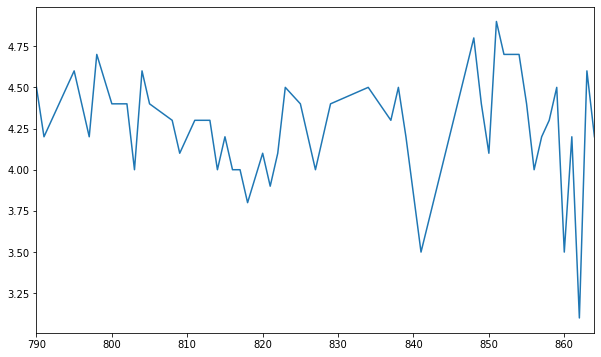

In [9]:
#Looking at the data distribution

plt.figure(figsize=(10, 6))
df["Rating"][600:650].plot()

Wide range of app ratings, in the interval we used.

# Reviews

In [10]:
#converting the reviews into float data

df['Reviews'] = df['Reviews'].astype(float)

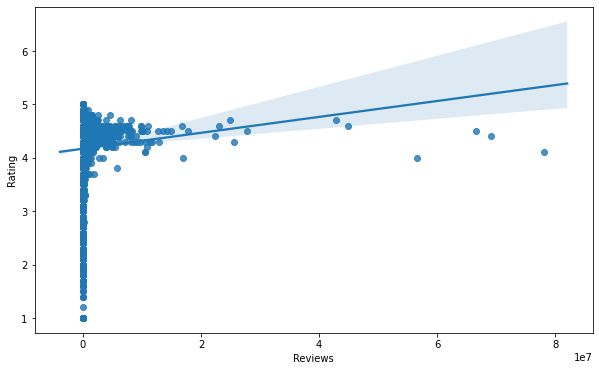

In [11]:
#Relation between number of reviews and app rating

plt.figure(figsize=(10, 6))
sns.regplot(x=df["Reviews"],y=df["Rating"])

# Installs

In [12]:
#Converting the Installs column into numeric

df['Installs']=df['Installs'].apply(lambda a:a.split('+')[0])   
se=df['Installs'].apply(lambda a:a.split(','))                      

def add_list(x):
    sum=' '
    for i in range(0,len(x)):
        sum+=x[i]
    return int(sum)  

df['Installs']=se.apply(lambda a:add_list(a))                      #Convert str to int values 


In [13]:
df['Installs'] = df['Installs'].astype(float)

In [14]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159.0,19M,10000.0,Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967.0,14M,500000.0,Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510.0,8.7M,5000000.0,Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644.0,25M,50000000.0,Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967.0,2.8M,100000.0,Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


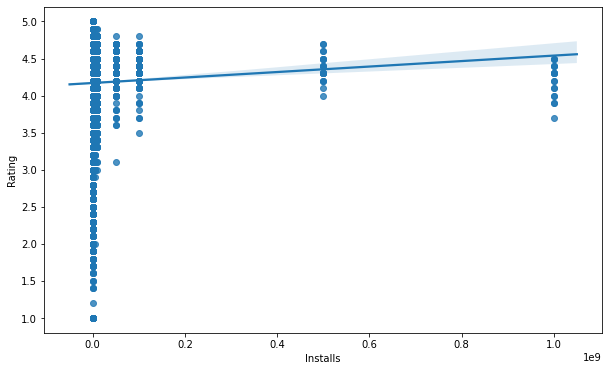

In [15]:
#Relation between number of installs and app rating

plt.figure(figsize=(10, 6))
sns.regplot(x=df["Installs"],y=df["Rating"])

# Price

In [16]:
#Removing Currency symbol from the Price and making it float

def remove_curr(x):
    if x !='0':
        x=x.split('$')[1]
    return float(x)   

df['Price']=df['Price'].apply(lambda a:remove_curr(a))  #Removes '$' from Price


In [17]:
df['Price'] = df['Price'].astype(float)

In [18]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159.0,19M,10000.0,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967.0,14M,500000.0,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510.0,8.7M,5000000.0,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644.0,25M,50000000.0,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967.0,2.8M,100000.0,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


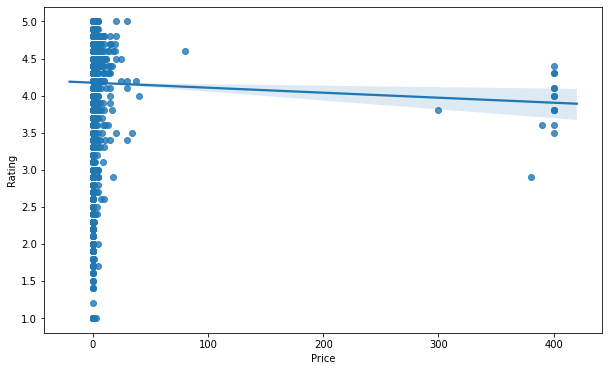

In [19]:
#Relation between app price and app rating

plt.figure(figsize=(10, 6))
sns.regplot(x=df["Price"],y=df["Rating"])

# Size

In [20]:
#removing the m from size

df["Size"]=df["Size"].astype(str).str.replace("M", "")

In [21]:
# Convert kbytes to Mbytes 
k_indices = df['Size'].loc[df['Size'].str.contains('k')].index.tolist()
converter = pd.DataFrame(df.loc[k_indices, 'Size'].apply(lambda x: x.strip('k')).astype(float).apply(lambda x: x / 1024).apply(lambda x: round(x, 3)).astype(str))
df.loc[k_indices,'Size'] = converter

In [22]:
df[df['Size'] == 'Varies with device'] = 0

In [23]:
df['Size'] = df['Size'].astype(float)

In [24]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159.0,19.0,10000.0,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967.0,14.0,500000.0,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510.0,8.7,5000000.0,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644.0,25.0,50000000.0,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967.0,2.8,100000.0,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


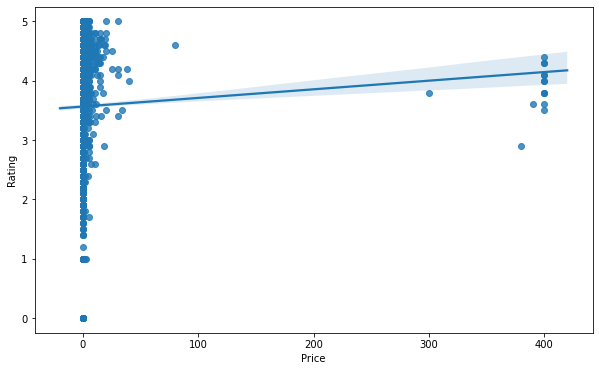

In [25]:
#Relation between app size (MB) and app rating

plt.figure(figsize=(10, 6))
sns.regplot(x=df["Price"],y=df["Rating"])

# Current Version

In [26]:
#clean all non numerical values & unicode charachters 


replace = [u'\u00AE', u'\u2013', u'\u00C3', u'\u00E3', u'\u00B3', '[', ']', "'"]
for i in replace:
	df['Current Ver'] = df['Current Ver'].astype(str).apply(lambda x : x.replace(i, ''))

regex = [r'[-+|/:/;(_)@]', r'\s+', r'[A-Za-z]+']
for j in regex:
	df['Current Ver'] = df['Current Ver'].astype(str).apply(lambda x : re.sub(j, '0', x))

df['Current Ver'] = df['Current Ver'].astype(str).apply(lambda x : x.replace('.', ',',1).replace('.', '').replace(',', '.',1)).astype(float)
df['Current Ver'] = df['Current Ver'].fillna(df['Current Ver'].median())

In [27]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159.0,19.0,10000.0,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.00,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967.0,14.0,500000.0,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.00,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510.0,8.7,5000000.0,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.24,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644.0,25.0,50000000.0,Free,0.0,Teen,Art & Design,"June 8, 2018",0.00,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967.0,2.8,100000.0,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.10,4.4 and up


# Type

In [28]:
df['Type'].unique()

array(['Free', 0, 'Paid'], dtype=object)

In [29]:
df['Type'] = pd.get_dummies(df['Type'])

In [30]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159.0,19.0,10000.0,0,0.0,Everyone,Art & Design,"January 7, 2018",1.00,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967.0,14.0,500000.0,0,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.00,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510.0,8.7,5000000.0,0,0.0,Everyone,Art & Design,"August 1, 2018",1.24,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644.0,25.0,50000000.0,0,0.0,Teen,Art & Design,"June 8, 2018",0.00,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967.0,2.8,100000.0,0,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.10,4.4 and up


In [31]:
df['Type'].unique()

array([0, 1], dtype=uint64)

In [32]:
#Now, free=0 and paid=1

# Taking X and y

In [33]:
#Taking the features we cleaned as inputs

X=df[['Reviews','Installs','Size','Price',"Type","Current Ver"]]

In [34]:
X.head()

,Reviews,Installs,Size,Price,Type,Current Ver
0,159.0,10000.0,19.0,0.0,0,1.00
1,967.0,500000.0,14.0,0.0,0,2.00
2,87510.0,5000000.0,8.7,0.0,0,1.24
3,215644.0,50000000.0,25.0,0.0,0,0.00
4,967.0,100000.0,2.8,0.0,0,1.10


In [35]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8190 entries, 0 to 10840
Data columns (total 6 columns):
Reviews        8190 non-null float64
Installs       8190 non-null float64
Size           8190 non-null float64
Price          8190 non-null float64
Type           8190 non-null uint8
Current Ver    8190 non-null float64
dtypes: float64(5), uint8(1)
memory usage: 711.9 KB


In [36]:
X.corr()

,Reviews,Installs,Size,Price,Type,Current Ver
Reviews,1.000000,0.597065,0.187631,-0.007684,-0.053364,-0.001445
Installs,0.597065,1.000000,0.144744,-0.009031,-0.062113,-0.001682
Size,0.187631,0.144744,1.000000,-0.015909,-0.340217,-0.007979
Price,-0.007684,-0.009031,-0.015909,1.000000,-0.024362,-0.000660
Type,-0.053364,-0.062113,-0.340217,-0.024362,1.000000,-0.004509
Current Ver,-0.001445,-0.001682,-0.007979,-0.000660,-0.004509,1.000000


In [37]:
X=X.values

In [38]:
#Taking the rating as y

y=df["Rating"].values

In [39]:
#SPLITTING THE DATA

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=8)

We shall be using the Random Forest Regressor. It is an ensemble method, and combines multiple decision trees in determining the final output rather than relying on individual decision trees.

In [40]:
#taking random forest regression

from sklearn.ensemble import RandomForestRegressor
forest_model = RandomForestRegressor(n_estimators=500, min_samples_leaf=500)
forest_model.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=500, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=500,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [41]:
#predicting using X-test

y_pred=forest_model.predict(X_test)

In [42]:
#computing the r2 score

score=r2_score(y_test,y_pred)

In [43]:
print('The r2 score is= ', score)

The r2 score is=  0.8851615041144445


Significantly good r2 score.

Now, we try to see the relations between the predicted and actual values, by plotting them for short intervals.

1. In a short interval of 50 values.

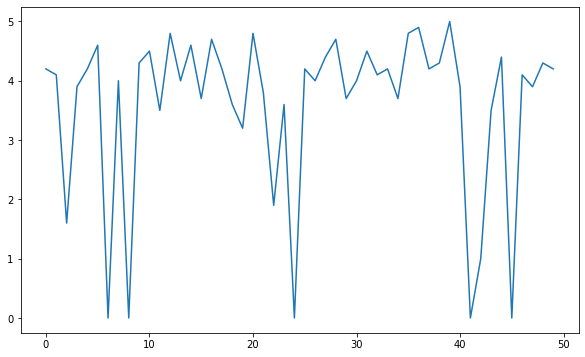

In [44]:
#the actual values from the dataset

plt.figure(figsize=(10, 6))
plt.plot(y_test[0:50])

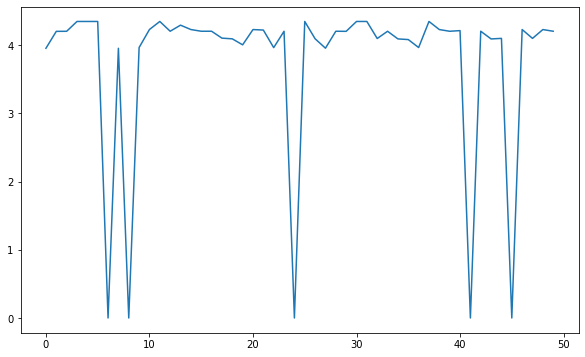

In [45]:
#the predicted values

plt.figure(figsize=(10, 6))
plt.plot(y_pred[0:50])

2. Taking 100 values.

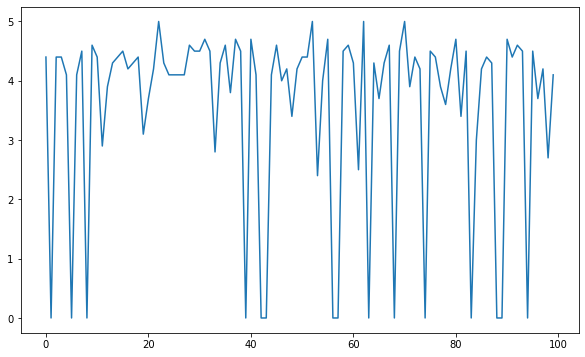

In [46]:
#actual values from dataset

plt.figure(figsize=(10, 6))
plt.plot(y_test[950:1050])

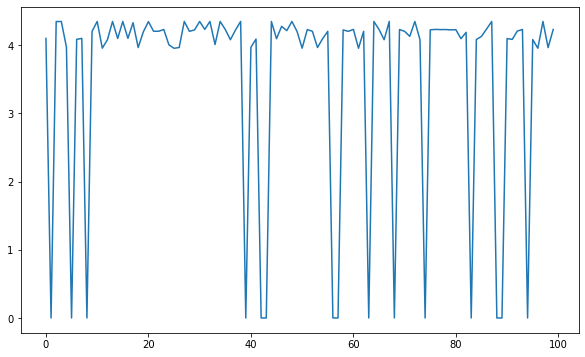

In [47]:
#the predicted values

plt.figure(figsize=(10, 6))
plt.plot(y_pred[950:1050])

3. Taking 20 values

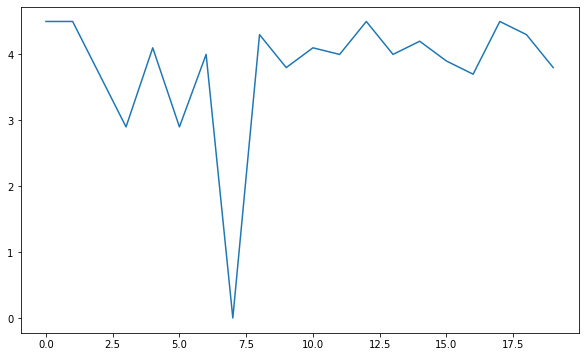

In [48]:
#the dalues from the data

plt.figure(figsize=(10, 6))
plt.plot(y_test[500:520])

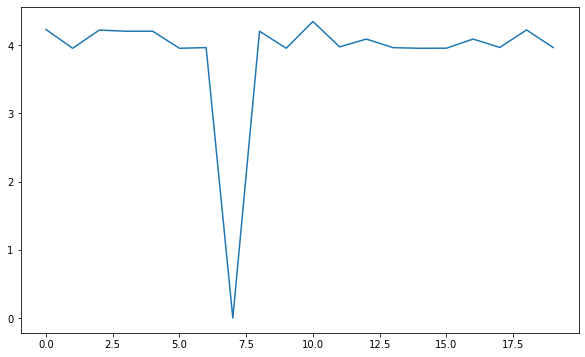

In [49]:
#the predicted values

plt.figure(figsize=(10, 6))
plt.plot(y_pred[500:520])

We can see the data is not getting overfit, but also maintaining close range to the actual values, so the model is well built.